**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---

### **Introducción al Aprendizaje Profundo**
### Trabajo Práctico I

---

**Integrantes:** Mara C. Avendaño, Enzo Manolucos, Silvia Ojeda y José Zerda

## Introducción

El presente trabajo tiene como objetivo implementar una red neuronal para predecir la presencia o ausencia de diabetes en personas, utilizando un dataset que contiene diversos indicadores médicos. A lo largo del trabajo, se explorarán diferentes enfoques, comenzando por un análisis preliminar del dataset. Posteriormente, se implementará una red neuronal simple como baseline, y finalmente se llevará a cabo una búsqueda de hiperparámetros para mejorar los resultados obtenidos.

### Paquetes de Python y Setup

In [ ]:
!pip install ydata-profiling
!pip install keras-tuner

# Importación de librerías de análisis de datos y visualización
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport # This import will now work

# Importación de librerías de aprendizaje automático
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Importación de librerías de preprocesamiento de datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Importación de librerías de utilidades
import tqdm

# Configuración de Pandas
pd.set_option('display.max_columns', None)

# Configuración de Matplotlib
%matplotlib inline

# Configuración de la semilla
seed = 27

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.7 MB/s eta 0:00:00


In [ ]:
# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Dispositivo utilizado: {device}')

Dispositivo utilizado: cuda


### Lectura del dataset

BRFSS (Behavioral Risk Factor Surveillance System) es una encuesta telefónica relacionada con la salud que se realiza anualmente por los CDC (Centros para Control y prevención de Enfermedades) desde 1984. Cada año, recoge respuestas de más de 400,000 estadounidenses sobre comportamientos de riesgo, enfermedades crónicas y uso de servicios preventivos. Para este proyecto, se utilizó un dataset de [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv) correspondiente al año 2015. Contiene 70.692 respuestas y 21 variables. La variable objetivo, Diabetes_binary, tiene 2 clases: 0 para no diabetes, y 1 para prediabetes o diabetes.

In [ ]:
path_dataset = '../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data = pd.read_csv(path_dataset)
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           1.0     0.0      1.0                0.0   
1                   0.0           0.0     1.0      0.0                0.0   
2                   0.0           1.0     1.0      1.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      3.0       5.0      30.0       0.0  1.0   
1            1.0          0.0      3.0       0.0       0.0       0.0  1.0   
2            1.0          0.0      1.0       0.0      10.0       0.0  1.0   
3            1.0          0.0      3.0       0.0       3.0       0.0  1.0   
4            1.0          0.0      2.0       0.0       0.0       0.0  0.0   

    Age  Education  Income  
0   4.0        6.0     8.0  
1  12.0        6.0     8.0  
2  13.0        6.0     8.0  
3  11.0        6.0     8.0  
4   8.0        5.0     8.0

In [ ]:
# Import the necessary module
from google.colab import drive
## Montamos el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ruta
path_dataset = '/content/drive/MyDrive/Colab Notebooks/IAP/Lab 1/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data = pd.read_csv(path_dataset)
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           1.0     0.0      1.0                0.0   
1                   0.0           0.0     1.0      0.0                0.0   
2                   0.0           1.0     1.0      1.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      3.0       5.0      30.0       0.0  1.0   
1            1.0          0.0      3.0       0.0       0.0       0.0  1.0   
2            1.0          0.0      1.0       0.0      10.0       0.0  1.0   
3            1.0          0.0      3.0       0.0       3.0       0.0  1.0   
4            1.0          0.0      2.0       0.0       0.0       0.0  0.0   

    Age  Education  Income  
0   4.0        6.0     8.0  
1  12.0        6.0     8.0  
2  13.0        6.0     8.0  
3  11.0        6.0     8.0  
4   8.0        5.0     8.0

## Análisis y exploración de datos (EDA)

Para la explorar los datos se utiliza `ydata_profiling`. Esta librería automatiza y estandariza la generación de informes detallados, completos con estadísticas y visualizaciones.

In [ ]:
profile = ProfileReport(data, title='Data Report', progress_bar=False)
profile.to_notebook_iframe()

### Resúmen del dataset

A partir del reporte generado, se pueden sacar las siguientes conclusiones:

- El conjunto de datos tiene 70.706 filas y 22 columnas (incluida la variable objetivo), de las cuales
    - Categóricas: 16
    - Numéricas: 6
- No hay datos faltantes
- Diabetes_binary (target) se encuentra perfectamente balanceada
- Stroke, HvyAlcoholConsump, CholCheck, y AnyHealthcare muestran desbalances considerables
- GenHlth y DiffWalk muestran alta correlación
- BMI tiene un promedio de 29,86 y un rango de 12 a 98
- MentHlth y PhysHlth tienen un gran número de ceros

En general, el conjunto de datos parece tener una estructura relativamente simple, con algunas columnas categóricas y numéricas que requieren una mayor atención debido a su desequilibrio o correlación.

### Preparación de los datos

Antes de implementar la red neuronal, se deben separar los datos en entrenamiento, validación y test. Primero se separan las todas las variables de la variable objetivo.

In [ ]:
# Separar X e y
X = data.drop('Diabetes_binary',axis=1).values
y = data['Diabetes_binary'].values

Mediante el método `train_test_split()` se dividen el conjunto de datos en:
- Entranamiento: 70%
- Validación: 15%
- Test: 15%

In [ ]:
# Dividir el conjunto en conjuntos de entrenamiento, validación y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

Con los datos ya separados, se escalan los datos mediante `MinMaxScaler()` ya que se requiere que todos los datos esten dentro de un rango específico. Los valores de todos los datos quedaran entre un rango de 0 y 1. Para las variables cuyos valores sean 0 y 1, no es necesario aplicar este escalado, ya que se aplica

\begin{equation}
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\end{equation}

Como

\begin{align}
X_{\text{min}} &= 0 \\
X_{\text{max}} &= 1
\end{align}


El resultado es
\begin{align}
X_{scaled} = X
\end{align}



In [ ]:
# Escalar los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Una vez escalados los datos, se convierten los datos de entrenamiento, validación y test en tensores de PyTorch mediante `Tensor()`. Los datos de salida se convierten en tensores de tipo `LongTensor` y se agregan una dimensión adicional con `unsqueeze(1)`. Luego, se convierten a tipo float.

In [ ]:
# Convertir los datos a tensores
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train).unsqueeze(1).float()

X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val).unsqueeze(1).float()

X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test).unsqueeze(1).float()

# Verificar si hay GPU disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Formar el conjuntos de entrenamiento, validación y test en tensores
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(torch.Size([49484, 21]),
 torch.Size([49484, 1]),
 torch.Size([10604, 21]),
 torch.Size([10604, 1]),
 torch.Size([10604, 21]),
 torch.Size([10604, 1]))

Se envían los datos de entrenamiento, validación y prueba a la GPU (si está disponible) utilizando el método `to()`

In [ ]:
# Enviar los datos a la GPU (si está disponible)
X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_val = X_val.to(device), y_val.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

### Función de entrenamiento y validación

La función `entrenar_modelo` realiza el entrenamiento durante un número de épocas determinado y, en cada época, calcula tanto la pérdida como la precisión (accuracy) en los conjuntos de entrenamiento y validación. Al final, también se incluye el codigo para la grafica la evolución de la pérdida y precisión a lo largo de las épocas y para que se mueste un reporte de clasificación final en el conjunto de validación

In [ ]:
def entrenar_modelo(modelo, X_train, y_train, X_val, y_val, epochs, optimizer, criterion):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in tqdm.trange(epochs):
        optimizer.zero_grad()
        y_pred = modelo.forward(X_train)
        loss_train = criterion(y_pred, y_train)
        loss_train.backward()
        optimizer.step()
        train_losses.append(loss_train.item())

        y_pred_labels = (y_pred >= 0.5).float()
        correct = (y_pred_labels == y_train).sum().item()
        total = len(y_train)
        accuracy = 100 * correct / total
        train_accuracies.append(accuracy)
        #if epoch % 10 == 0:
        #    print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

        with torch.no_grad():
            y_pred_val = modelo.forward(X_val)
            loss_val = criterion(y_pred_val, y_val)
            val_losses.append(loss_val.item())

            # Calcula la precisión
            y_pred_labels = (y_pred_val >= 0.5).float()
            correct = (y_pred_labels == y_val).sum().item()
            total = len(y_val)
            accuracy = 100 * correct / total
            val_accuracies.append(accuracy)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title('Función de pérdida a lo largo las épocas')
    plt.plot(train_losses, label='Entrenamiento')
    plt.plot(val_losses, label='Validación')
    plt.ylabel('Pérdida')
    plt.xlabel('Épocas')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Precisión (Accuracy) a lo largo las épocas')
    plt.plot(train_accuracies, label='Entrenamiento')
    plt.plot(val_accuracies, label='Validación')
    plt.ylabel('Precisión (%)')
    plt.xlabel('Épocas')
    plt.legend()

    y_pred = modelo.forward(X_val)
    y_pred_class = (y_pred >= 0.5).float() # Convierte las predicciones a etiquetas (0 o 1)
    print('Validación:')
    report = classification_report(y_val, y_pred_class)

    print(report)

Si bien inicialmente hemos preparado los datos para usar Pytorch, en el presente trabajo empleamos redes neuronales usando primero Keras y luego Pytorch. Nuestra idea de usar keras, además de que la librería se mencionó en clases, tuvo que ver con el hecho de que en otra materia, habíamos trabajado con una red neuronal aplicando esta librería. También leimos que el uso de keras se aconseja para quienes recién comienzan a trabajar con redes neuronales, debido a su simplicidad y facilidad de uso. Por ejemplo, notamos que en Keras no debemos construir explícitamente los tensores, ya que este proceso se gestiona automáticamente. En PyTorch, en cambio, sí.

## Red Neuronal (Baseline)

Como baseline se utiliza una red neuronal implementada mediante Keras. Se construye mediante los siguientes parámetros:

- Entradas: 21
- Cantidad de capas: 2
- Neuronas por capas: 4 y 8
- Salidas: 1
- Funcion de activación
    - Capas ocultas: Relu
    - Capa de salids: Sigmoid

Luego se compila con el objetivo de mejorar la métrica. El modelo cuenta con el optimizador Adam y la función de pérdida de entropía cruzada binaria. Finalmente se entrena el modelo

In [ ]:
# Asegúrate de mover los datos de PyTorch a NumPy
X_train_np = X_train.cpu().numpy()
y_train_np = y_train.cpu().numpy()
X_val_np = X_val.cpu().numpy()
y_val_np = y_val.cpu().numpy()

# Construir la red neuronal con parámetros por defecto
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_np.shape[1],)),  # Capa oculta con 4 neuronas
    Dense(8, activation='relu'),  # Capa oculta con 8 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo (baseline)
history = model.fit(X_train_np, y_train_np, epochs=20, batch_size=32, validation_data=(X_val_np, y_val_np))


Epoch 1/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6394 - loss: 0.6257 - val_accuracy: 0.7298 - val_loss: 0.5379
Epoch 2/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7339 - loss: 0.5307 - val_accuracy: 0.7354 - val_loss: 0.5290
Epoch 3/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7449 - loss: 0.5152 - val_accuracy: 0.7381 - val_loss: 0.5238
Epoch 4/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7456 - loss: 0.5122 - val_accuracy: 0.7412 - val_loss: 0.5208
Epoch 5/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7442 - loss: 0.5126 - val_accuracy: 0.7418 - val_loss: 0.5188
Epoch 6/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7462 - loss: 0.5099 - val_accuracy: 0.7414 - val_loss: 0.5168
Epoch 7/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7492 - loss: 0.5080 - val_accuracy: 0.7400 - val_loss: 0.5201
Epoch 8/20
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7501 - loss: 0.5078 - 

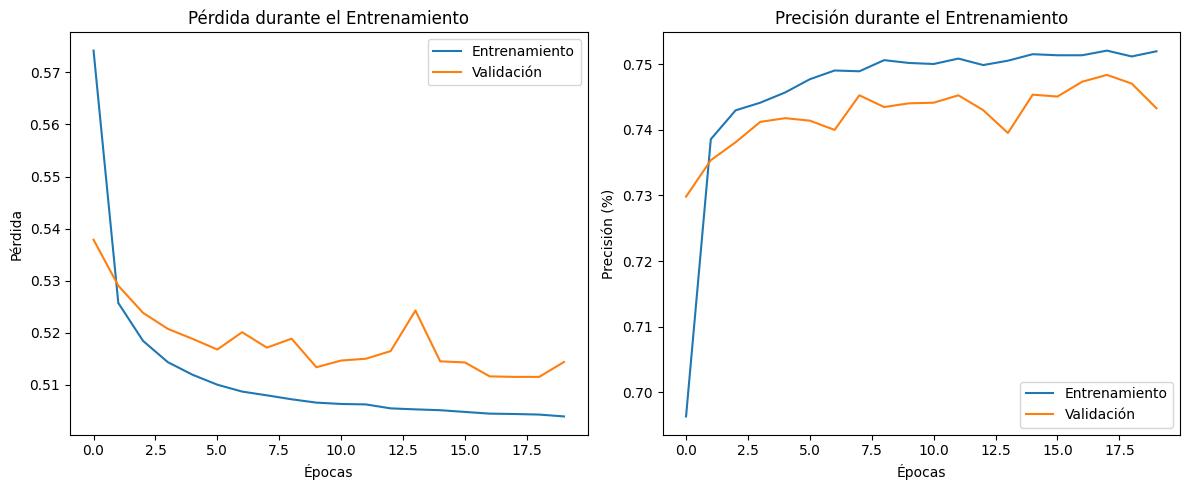

In [ ]:
# Pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Función de pérdida a lo largo las épocas')
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.title('Precisión (Accuracy) a lo largo las épocas')
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.legend()

plt.tight_layout()
plt.show()

Análisis de Resultados
Pérdida (Loss) y Precisión (Accuracy) durante el Entrenamiento:
A lo largo de las 20 épocas, la precisión de entrenamiento mejoró de aproximadamente 63.94% a 75.20%, y la pérdida disminuyó de 0.6257 a 0.5033. Esto indica que el modelo está aprendiendo y ajustándose a los datos de entrenamiento.

Pérdida (Loss) y Precisión (Accuracy) durante la Validación:
La precisión de validación aumentó de 72.98% a 74.33%, y la pérdida de validación mostró una ligera disminución de 0.5379 a 0.5144. Esto sugiere que el modelo tiene un rendimiento razonable en el conjunto de validación, aunque no mejoró tanto como en el conjunto de entrenamiento.

In [ ]:
# Hacer predicciones sobre los datos de validación
y_pred = model.predict(X_val_np)  # Asegúrate de usar X_val_np
y_pred_class = (y_pred > 0.5).astype(int)  # Convierte las predicciones a etiquetas (0 o 1)

# Convertir y_val a un array de NumPy si es necesario
y_val_np = y_val.cpu().numpy()  # Convierte y_val a NumPy

print('Validación:')
report = classification_report(y_val_np, y_pred_class)
print(report)


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validación:
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      5307
         1.0       0.74      0.75      0.74      5297

    accuracy                           0.74     10604
   macro avg       0.74      0.74      0.74     10604
weighted avg       0.74      0.74      0.74     10604



Precisión (Precision):
Para la clase 0.0: 0.75
Para la clase 1.0: 0.74
Un valor de 0.75 para la clase 0.0 y 0.74 para la clase 1.0 sugiere que el modelo tiene un buen rendimiento en términos de minimizar los falsos positivos.

Exhaustividad (Recall):
Para la clase 0.0: 0.74
Para la clase 1.0: 0.75
En este caso, el modelo tiene un recall bastante equilibrado, lo que indica que está capturando bien ambos tipos de muestras, aunque no de manera perfecta.

F1-Score:
Para ambas clases: 0.74
Un valor de 0.74 sugiere que el modelo tiene un buen equilibrio entre precisión y recall


Exactitud (Accuracy):
La exactitud del modelo es del 74%, lo que significa que el 74% de todas las predicciones realizadas por el modelo son correctas.

En base a los resultados notamos que precisión de entrenamiento está aumentando más rápidamente que la precisión de validación, lo que podría ser una señal de sobreajuste (overfitting). Por lo que el modelo está ajustando bien a los datos de entrenamiento, pero no generaliza tan bien a los datos que no ha visto (conjunto de validación).

Trataremos de salir del sobreajuste optimizando hiperparámetros

Definiremos a continuación una función llamada `build_model` que toma un argumento hp, que es una instancia de Keras Tuner que permite la búsqueda de hiperparámetros.

In [ ]:
def build_model(hp):
    # Se crea un modelo secuencial, que es un tipo de modelo en Keras donde las capas se apilan una tras otra.
    model = Sequential()

    # Buscar el número de neuronas en la primera capa oculta
    hp_units_1 = hp.Int('units_1', min_value=4, max_value=128, step=16)
    # hp.Int('units_1', min_value=4, max_value=128, step=16) busca el número de neuronas
    # para la primera capa oculta, variando entre 16 y 128 en pasos de 16.

    model.add(Dense(units=hp_units_1, activation='relu', input_shape=(X_train.shape[1],)))
    # model.add(Dense(...)) agrega una capa densa (completamente conectada)
    # al modelo con el número de neuronas elegido y una función de activación relu.
    # Se especifica también la forma de entrada (input_shape) basada en el número de
    # características en el conjunto de datos de entrenamiento (X_train).


    # Buscar el número de neuronas en la segunda capa oculta
    hp_units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8)
    model.add(Dense(units=hp_units_2, activation='relu'))
    # Similar al paso anterior, se busca el número de neuronas para la segunda capa oculta,
    # variando entre 8 y 64 en pasos de 8.

    # Capa de salida (no es necesario ajustar)
    model.add(Dense(1, activation='sigmoid'))
    # Se agrega una capa de salida con una única neurona y una función de activación sigmoid.
    # Esto es típico para problemas de clasificación binaria, ya que produce una salida entre 0 y 1.

    # Buscar el optimizador
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    # Esta línea permite seleccionar uno de varios optimizadores disponibles (adam, rmsprop, sgd).
    # hp.Choice permite elegir un valor de una lista predefinida.

    # Compilar el modelo
    model.compile(optimizer=hp_optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # Finalmente, se compila el modelo con el optimizador seleccionado,
    # utilizando binary_crossentropy como función de pérdida (adecuada para clasificación binaria)
    # y se establece que se quiere monitorear la accuracy (precisión).

    return model

Se crea el tuner para la búsqueda de hiperparámetros

In [ ]:
tuner = kt.RandomSearch(
    # la línea previa inicia la creación de un tuner utilizando el método RandomSearch,
    # que busca aleatoriamente combinaciones de hiperparámetros.

    build_model,
    # Se pasa la función build_model (definida en el código anterior) que construye el modelo.
    # El tuner utilizará esta función para crear modelos con diferentes configuraciones de hiperparámetros.

    objective='val_accuracy',  # Optimizamos para la precisión de validación. Esto significa
    # que el tuner ajustará los hiperparámetros buscando la mejor precisión en este conjunto de datos.

    max_trials=5,  # Número de combinaciones de hiperparámetros a probar.
    # Se define el número máximo de combinaciones de hiperparámetros que se probarán.
    # En este caso, se realizarán un máximo de 5 pruebas diferentes.

    executions_per_trial=3,  # Entrenar 3 veces cada combinación para promediar los resultados.
    # Para cada combinación de hiperparámetros probada, se entrenará el modelo 3 veces.
    # Esto es útil para obtener una estimación más robusta del rendimiento promedio del modelo,
    # ya que promediar los resultados puede ayudar a reducir la variabilidad y el ruido en la evaluación.

    directory='my_dir',
    project_name='hyperparameter_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Se realiza la búsqueda de hiperparámetros

In [ ]:
# Si X_train y y_train son tensores de PyTorch, conviértelos a NumPy
X_train_np = X_train.cpu().numpy()  # Asegúrate de que X_train esté en la CPU
y_train_np = y_train.cpu().numpy()  # Asegúrate de que y_train esté en la CPU

# Búsqueda de hiperparámetros
tuner.search(X_train_np, y_train_np, epochs=20, batch_size=32, validation_split=0.2)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 04m 09s]
val_accuracy: 0.7565255363782247

Best val_accuracy So Far: 0.7565255363782247
Total elapsed time: 00h 12m 33s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Los mejores hiperparámetros son los siguientes

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Mejor número de neuronas en la primera capa: {best_hps.get("units_1")}')
print(f'Mejor número de neuronas en la segunda capa: {best_hps.get("units_2")}')
print(f'Mejor optimizador: {best_hps.get("optimizer")}')

Mejor número de neuronas en la primera capa: 116
Mejor número de neuronas en la segunda capa: 16
Mejor optimizador: adam


Después de la búsqueda, se obtiene el mejor modelo

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

Epoch 1/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7516 - loss: 0.5051 - val_accuracy: 0.7481 - val_loss: 0.5126
Epoch 2/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7520 - loss: 0.5055 - val_accuracy: 0.7456 - val_loss: 0.5152
Epoch 3/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7525 - loss: 0.5051 - val_accuracy: 0.7475 - val_loss: 0.5113
Epoch 4/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7511 - loss: 0.5056 - val_accuracy: 0.7454 - val_loss: 0.5159
Epoch 5/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7523 - loss: 0.5032 - val_accuracy: 0.7497 - val_loss: 0.5108
Epoch 6/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7562 - loss: 0.4992 - val_accuracy: 0.7488 - val_loss: 0.5127
Epoch 7/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7546 - loss: 0.4995 - val_accuracy: 0.7486 - val_loss: 0.5122
Epoch 8/50
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7545 - loss: 0.5017 - 

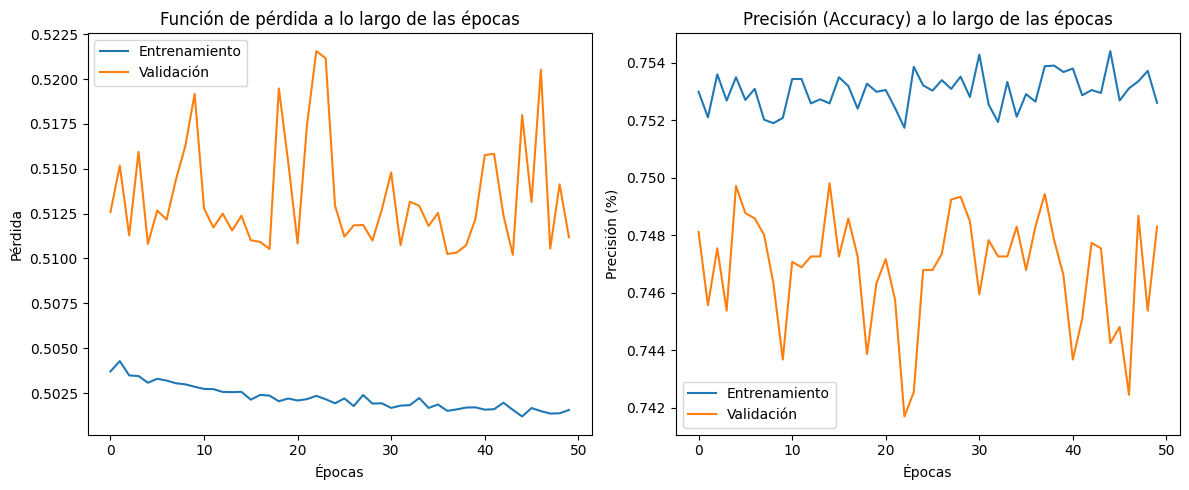

In [ ]:
# Mover los datos a la CPU si están en la GPU
X_train_cpu = X_train.cpu()
y_train_cpu = y_train.cpu()
X_val_cpu = X_val.cpu()
y_val_cpu = y_val.cpu()

# Entrenar el modelo y guardar el historial
history = model.fit(X_train_cpu, y_train_cpu, epochs=50, batch_size=32, validation_data=(X_val_cpu, y_val_cpu), verbose=1)

# Pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Función de pérdida a lo largo de las épocas')
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.title('Precisión (Accuracy) a lo largo de las épocas')
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Mover los datos de validación a la CPU si están en la GPU
X_val_cpu = X_val.cpu()

# Realizar las predicciones en el conjunto de validación
y_pred = model.predict(X_val_cpu)

# Convertir las predicciones a etiquetas (0 o 1)
y_pred_class = (y_pred > 0.5).astype(int)

print('Validación:')
report = classification_report(y_val.cpu(), y_pred_class)  # Asegúrate de mover y_val a CPU si es necesario
print(report)


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validación:
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73      5307
         1.0       0.72      0.82      0.76      5297

    accuracy                           0.75     10604
   macro avg       0.75      0.75      0.75     10604
weighted avg       0.75      0.75      0.75     10604



Exactitud (Accuracy): La precisión de entrenamiento se mantiene alrededor del 75.1% al 75.7%.
La precisión de validación varía entre 74.1% y 75.6%, con una ligera tendencia a la baja.

Pérdida (Loss): La pérdida de entrenamiento muestra un ligero descenso, oscilando alrededor de 0.499 a 0.505.
La pérdida de validación es relativamente constante, con valores entre 0.510 y 0.519.

Métricas de validación (Precision, Recall, F1-Score): La precisión y el recall están bastante equilibrados, pero ambos son relativamente bajos. La precisión para la clase 0 es de 0.79 y para la clase 1 es de 0.72, lo que sugiere un rendimiento aceptable pero no óptimo. El F1-score promedio es 0.75, lo cual también indica un rendimiento moderado.

Underfitting: Pensamos que el modelo tiene un cierto grado de underfitting, ya que la precisión tanto de entrenamiento como de validación no es muy alta (alrededor del 75%). Esto sugiere que el modelo no está aprendiendo lo suficiente de los datos.


Como mencionamos anteriormente, empleamos Keras de TensorFlow  dado que ya conociamos esta librería. A continuacoón utilizaremos Pytorch para el mismo modelo Baseline dado que en el curso de Aprendizaje profundo empeamos esta librería.

## Busqueda de mejores resultados

### 1. Red Neuronal con PyTorch

Se tomo el ejemplo visto en clase que define una red neuronal con arquitectura de capas fully connected. La clase hereda de `nn.Module`, que es la clase base para todos los módulos de PyTorch. El constructor `__init__()` define los parámetros:
la red nueronal simple vista en clase, la misma cuanta con:
- Entradas: 21
- Cantidad de capas: 2
- Neuronas por capas: 4 y 8
- Salidas: 1
- Funcion de activación
    - Capas ocultas: Relu
    - Capa de salids: Sigmoid

El método `forward` define el flujo de datos a través de la red neuronal. Recibe un tensor **x** como entrada y lo procesa a través de las capas de la red neuronal.
La salida de la red neuronal es un tensor que representa la probabilidad de pertenencia a una clase

In [ ]:
# Definción de la clase Baseline
class RedNeuronalPyTorch(nn.Module):
    def __init__(self, in_features = 21, hidden_layer_1 = 4, hidden_layer_2=8, out_features = 1):
        super().__init__()
        self.fully_connected_1 = nn.Linear(in_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear( hidden_layer_1,  hidden_layer_2)
        self.output = nn.Linear( hidden_layer_2, out_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = torch.sigmoid(self.output(x))
        return x

Una vez ya creada la clase `ClasificadorNN`, se la debe configurar. Para esto se fija la semilla aleatoria para garantizar la reproducibilidad de los resultados. Se crea una instalcia del modelo. No se le pasa ningun parámetro ya que utiliza los que estan por defecto en la clase. Se define:
- Taza de aprendizaje: 0.1
- Función de perdida: `BCELoss()` (Binary Cross-Entropy Loss)
- Optimización: Adam

Luego se muestran los parámetros del modelo

100%|██████████| 100/100 [00:00<00:00, 130.26it/s]


Validación:
              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72      5307
         1.0       0.71      0.82      0.76      5297

    accuracy                           0.74     10604
   macro avg       0.75      0.74      0.74     10604
weighted avg       0.75      0.74      0.74     10604



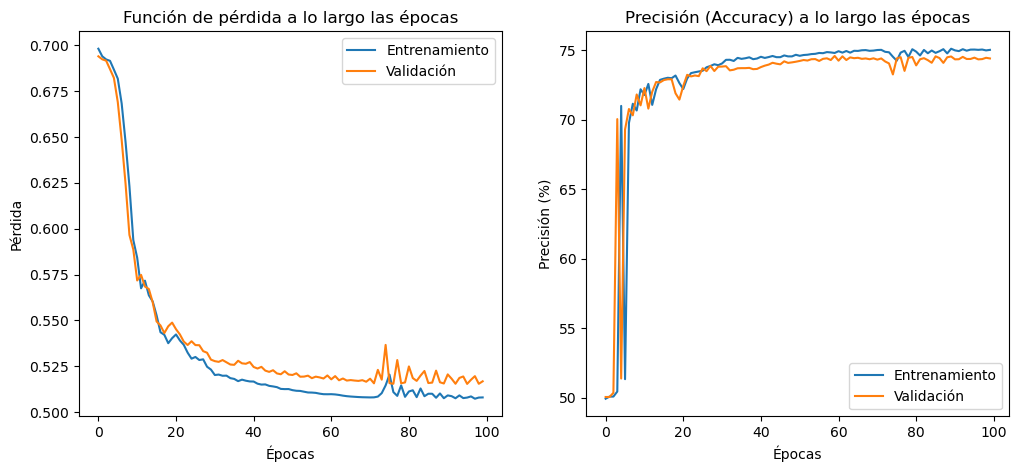

In [ ]:
# Instanciación, entrenamiento y evaluación del modelo_baseline
torch.manual_seed(seed)
model_baseline = RedNeuronalPyTorch()
lr = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_baseline.parameters(), lr=lr)
#print(model_baseline.parameters)
entrenar_modelo(model_baseline, X_train, y_train, X_val, y_val, epochs=100, optimizer=optimizer, criterion=criterion)

Función de pérdida: disminuye para las primeras 30 épocas, indicando que la red aprende de forma correcta. Para las últimas épocas empieza a oscilar mientras disminuye levemente. Esto podria ser un sobreajuste

Precisión: las primeras 30 épocas mejora significativamente, esta estabilizarse en 74.42%

Tal como esperabamos para el modelo Baseline resultados similares a los de Keras. De acuerdo a los que hemos estudiado Pytorch es más flexible y permite  realizar otras modificaciones a la arquitectura del modelo o a los procesos de entrenamiento.Por lo tanto continuareos trabajando con esta librería.

### 2. Una capa más

Siguiendo la lógica anterior, la tercera capa tendra el doble de neuronas, es decir, 16. El resto de parámetros son iguales

In [ ]:
# Definción de la clase igual a Baseline, más una capa
class RedNeuronal(nn.Module):
    def __init__(self, in_features = 21, hidden_layer_1 = 4, hidden_layer_2=8, hidden_layer_3=16, out_features = 1):
        super().__init__()
        self.fully_connected_1 = nn.Linear(in_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear( hidden_layer_1,  hidden_layer_2)
        self.fully_connected_3 = nn.Linear( hidden_layer_2,  hidden_layer_3)
        self.output = nn.Linear( hidden_layer_3, out_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = F.relu(self.fully_connected_3(x))
        x = torch.sigmoid(self.output(x))
        return x

100%|██████████| 100/100 [00:01<00:00, 69.20it/s]


Validación:
              precision    recall  f1-score   support

         0.0       0.83      0.61      0.70      5307
         1.0       0.69      0.87      0.77      5297

    accuracy                           0.74     10604
   macro avg       0.76      0.74      0.74     10604
weighted avg       0.76      0.74      0.74     10604



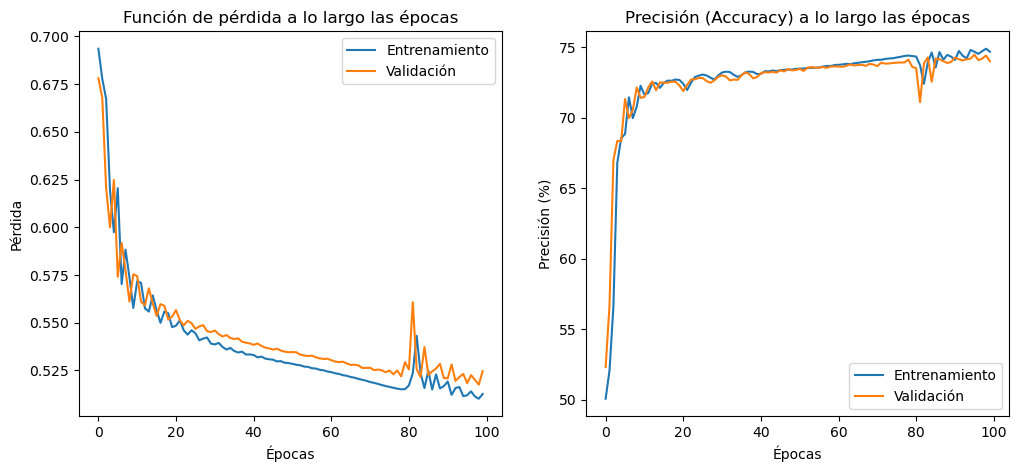

In [ ]:
# Instanciación, entrenamiento y evaluación del modelo
torch.manual_seed(seed)
model_1 = RedNeuronal()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.1)
criterion = nn.BCELoss()
entrenar_modelo(model_1, X_train, y_train, X_val, y_val, epochs=100, optimizer=optimizer, criterion=criterion)

Función de pérdida: disminuye de manera constante pero en las últimas épocas empieza a oscilar abruptamente. Esto podria indicar un sobreajuste.

Precisión: en las primeras épocas mejora significativamente pero vuelve a oscilar en las últimas épocas.


En vista de estos resultados nos quedaremos con el modelo BaseLine con solo 2 capas y para seguir mejorando nuestra red cambiaremos la función de activación.


### 3. Cambio de función de activación

Para las capas ocultas se utiliza función ReLU, si la entrada $x$ es positiva, la salida es $x$, y si la entrada $x$ es negativa, la salida es 0. Se define como

\begin{equation}
f(x) = \max(0, x)
\end{equation}

Para la capa de salida de utiliza la función tangente hiperbólica `tanh`

\begin{equation}
\tanh(x) = \frac{2}{1 + e^{-2x}} - 1
\end{equation}

La función tanh es similar a la función `sigmoid`, pero tiene algunas propiedades diferentes
- La salida de la función tanh está entre -1 y 1
- La función tanh es simétrica alrededor del origen, lo que significa que $\tanh(-x) = -\tanh(x))$
- La función tanh es una función creciente, lo que significa que a medida que la entrada x aumenta, la salida $\tanh(x)$ también aumenta
- La función tanh tiene una pendiente máxima en el origen $(x=0)$, lo que significa que la función es más sensible a los cambios en la entrada cerca del origen

Aunque como desventaja es más costosa computacionalmente y su entrenamiento puede ser más lento. Los valores de la función `tanh` estan entre $[-1, 1]$, entonces se debe cambiar el criterio por `SmoothL1Loss`.


In [ ]:
# Definción de la clase igual a Baseline con cambios en la capa de salida
class RedNeuronal_tanh(nn.Module):
    def __init__(self, in_features = 21, hidden_layer_1 = 4, hidden_layer_2=8, out_features = 1):
        super().__init__()
        self.fully_connected_1 = nn.Linear(in_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear( hidden_layer_1,  hidden_layer_2)
        self.output = nn.Linear( hidden_layer_2, out_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = torch.tanh(self.output(x))
        return x

100%|██████████| 100/100 [00:00<00:00, 146.34it/s]


Validación:
              precision    recall  f1-score   support

         0.0       0.80      0.66      0.72      5307
         1.0       0.71      0.83      0.76      5297

    accuracy                           0.74     10604
   macro avg       0.75      0.74      0.74     10604
weighted avg       0.75      0.74      0.74     10604



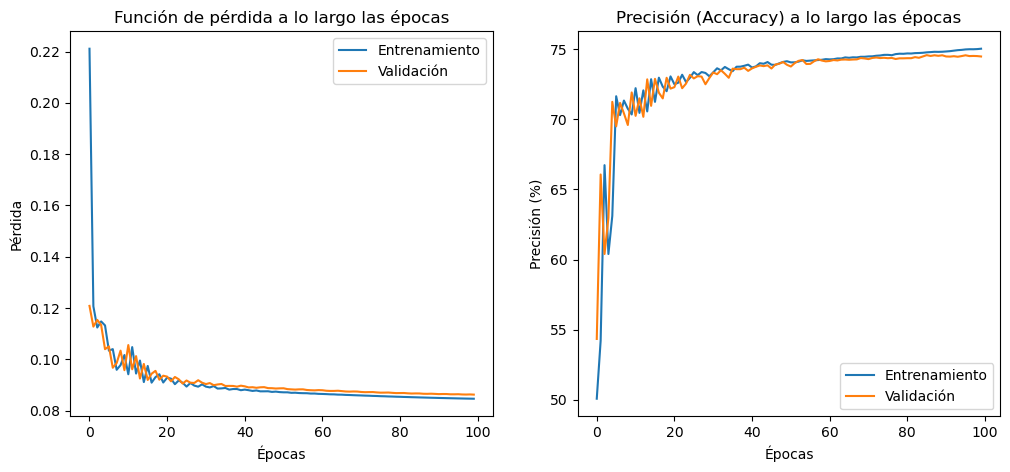

In [ ]:
# Instanciación, entrenamiento y evaluación del modelo
torch.manual_seed(seed)
model_2 = RedNeuronal_tanh()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.1)
criterion = nn.SmoothL1Loss()
entrenar_modelo(model_2, X_train, y_train, X_val, y_val, epochs=100, optimizer=optimizer, criterion=criterion)

Función de pérdida: comienza más baja y desciende rápidamente. Ambas curvas son casi idénticas, lo que indica que no hay señales de sobreajuste

Precisión: mejora rápidamente en ambas curvas y se mantien constante

### 4. Regularización y reducción de la tasa de aprendizaje

Para este caso se parte del modelo Baseline + camio en la función de activación en la capa de salida. A continuación ee le agrega la regularizacion mediante `dropout` y se cambia la tasa de aprendizaje

In [ ]:
# Definción de la clase igual a Baseline con cambios en la capa de salida
class RedNeuronal_tanh_drop(nn.Module):
    def __init__(self, in_features = 21, hidden_layer_1 = 4, hidden_layer_2=8, out_features = 1, dropout_rate=0.1):
        super().__init__()
        self.fully_connected_1 = nn.Linear(in_features, hidden_layer_1)
        self.dropout_1 = nn.Dropout(dropout_rate)
        self.fully_connected_2 = nn.Linear( hidden_layer_1,  hidden_layer_2)
        self.dropout_2 = nn.Dropout(dropout_rate)
        self.output = nn.Linear( hidden_layer_2, out_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = self.dropout_1(x)
        x = F.relu(self.fully_connected_2(x))
        x = self.dropout_2(x)
        x = torch.tanh(self.output(x))
        return x

100%|██████████| 100/100 [00:00<00:00, 126.40it/s]


Validación:
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71      5307
         1.0       0.71      0.70      0.70      5297

    accuracy                           0.70     10604
   macro avg       0.70      0.70      0.70     10604
weighted avg       0.70      0.70      0.70     10604



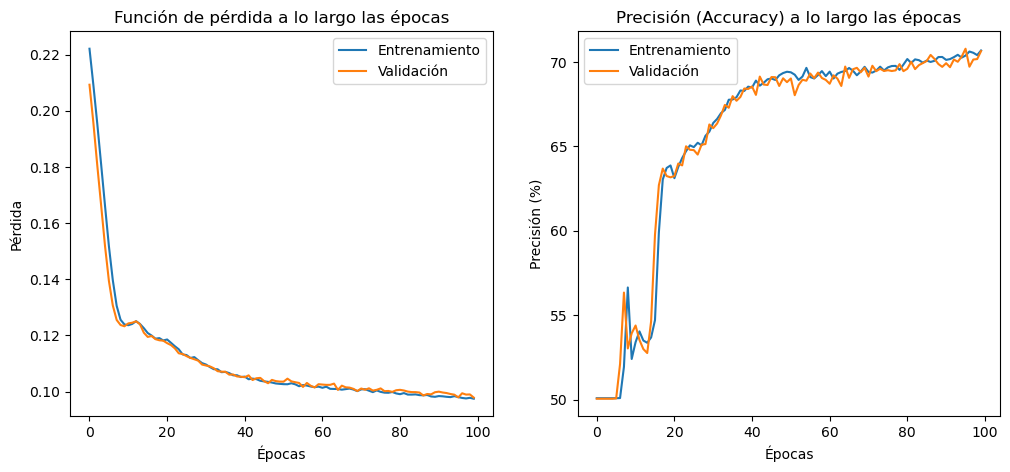

In [ ]:
# Instanciación, entrenamiento y evaluación del modelo
torch.manual_seed(seed)
model_3 = RedNeuronal_tanh_drop()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.01)
criterion = nn.SmoothL1Loss()
entrenar_modelo(model_3, X_train, y_train, X_val, y_val, epochs=100, optimizer=optimizer, criterion=criterion)

Función de pérdida: desciende rápidamente. Ambas curvas son casi idénticas, lo que indica que no hay señales de sobreajuste

Precisión: oscila abruptamente en las primeras épocas pero mejora en ambas curvas y se mantien constante

### Test para el mejor modelo

In [ ]:
y_pred = model_2.forward(X_test)
y_pred_class = (y_pred > 0.5).float() # Convertir las probabilidades en clases binarias (0 o 1)

print(f'Predicciones:\t\t{y_pred_class[:10].flatten()}')
print(f'Etiquetas reales:\t{y_test[:10].flatten()}')

Predicciones:		tensor([0., 0., 0., 1., 0., 1., 1., 0., 1., 1.])
Etiquetas reales:	tensor([0., 1., 0., 1., 0., 1., 1., 0., 0., 1.])


In [ ]:
# Reporte de clasificación (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred_class)
print("Reporte de clasificación:\n", class_report)

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      5259
         1.0       0.73      0.80      0.76      5345

    accuracy                           0.75     10604
   macro avg       0.75      0.75      0.75     10604
weighted avg       0.75      0.75      0.75     10604



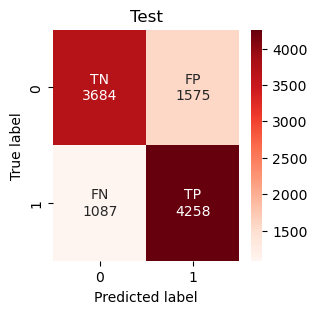

In [ ]:
test_prediction = (model_2.forward(X_test) >= 0.5).float()
cm_test = confusion_matrix(y_test, test_prediction)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in cm_test.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]

labels = np.asarray(labels).reshape(2, 2)

fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm_test, annot=labels, fmt='', cmap='Reds', cbar=True, ax=ax)
ax.set_title('Test')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
plt.show()

## Conclusion sobre Optimización de Redes Neuronales con PyTorch

En este trabajo práctico de Deep Learning utilizando PyTorch, se exploraron diversas configuraciones para optimizar una red neuronal, comenzando con un modelo base que mostró resultados prometedores. Al ajustar los hiperparámetros, se observaron las siguientes variaciones:

### 1. Arquitectura de la Red

- **Modelo Base**: Una red con 2 capas ocultas de 4 y 8 neuronas cada una.
- **Modelo Aumentado**: Se incrementó a 4 capas con 16 neuronas en la ultima capa. Sin embargo, esto no mejoró el rendimiento y, en algunos casos, provocó sobreajuste.
- **Conclusión**: Una arquitectura más simple fue más efectiva, resaltando la importancia de no sobrecomplicar el modelo.

### 2. Funciones de Activación

- **ReLU**: Utilizada en el modelo base, proporcionó buenos resultados.
- **Sigmoid**: Al reemplazar ReLU por Sigmoid, se notó una disminución en la velocidad de convergencia y en la precisión final.
- **Tanh**: Ofreció un rendimiento intermedio entre ReLU y Sigmoid.
- **Conclusión**: ReLU resultó ser la función de activación más adecuada para este problema.

### 3. Funciones de Pérdida

- **MSELoss**: Utilizada inicialmente para problemas de regresión.
- **CrossEntropyLoss**: Al cambiar a esta función en problemas de clasificación, se mejoró la precisión del modelo.
- **Conclusión**: La elección de la función de pérdida debe alinearse con el tipo de problema y las funciones de activación utilizadas.

### 4. Optimizadores

- **SGD (Stochastic Gradient Descent)**:
  - Usado en el modelo base con una tasa de aprendizaje de `0.01`.
- **Adam**:
  - Al cambiar a Adam con una tasa de aprendizaje de `0.001`, se observó una convergencia más rápida y una mejor precisión.
- **Conclusión**: El optimizador Adam mejoró la eficiencia del entrenamiento en comparación con SGD.

### 5. Regularización

- **Dropout**:
  - Se aplicó un dropout de `0.5` después de las capas ocultas.
  - No se observó mejora en el rendimiento; en algunos casos, el rendimiento disminuyó.
- **Conclusión**: La regularización no fue necesaria para este modelo simple y pudo haber afectado negativamente al aprendizaje.

### 6. Tasa de Aprendizaje

- **0.01**: Tasa inicial que permitió una convergencia estable.
- **0.1**: Provocó oscilaciones y falta de convergencia.
- **0.001**: Convergencia más lenta pero más precisa.
- **Conclusión**: Una tasa de aprendizaje de `0.01` fue el mejor compromiso entre velocidad y estabilidad.

---

En definitiva, el principio **KISS (Keep It Simple, Stupid)** resultó efectivo en este contexto: la arquitectura más simple de la red fue la que produjo los mejores resultados. Este resultado refuerza la idea de que, en ciertos problemas, mantener la simplicidad en el diseño puede superar a arquitecturas más complejas, evitando el sobreajuste y favoreciendo una mejor generalización.

---

## Conclusión

Se llevaron a cabo exploraciones de diversas configuraciones con el fin de optimizar la red neuronal. Inicialmente, se utilizó la biblioteca Keras de TensorFlow, dada la familiaridad y experiencia previa con esta herramienta. A pesar de las optimizaciones implementadas, la función de pérdida alcanzó un valor de 0.5. Al aplicar el mismo modelo base en PyTorch, los resultados se mostraron similares. Sin embargo, el uso inicial de Keras facilitó una comprensión general de las redes neuronales, lo que posteriormente permitió que la flexibilidad de PyTorch habilitara un análisis más detallado de la arquitectura de la red, la gestión de datos, el cálculo de gradientes, la creación y funcionamiento de tensores, entre otros aspectos relevantes.

En el entorno de PyTorch, se exploraron diversas configuraciones para la optimización de la red neuronal, comenzando desde un modelo base. A pesar de la incorporación de capas adicionales y neuronas, no se lograron las mejoras esperadas, lo que sugiere que el diseño óptimo se encuentra a través de un proceso iterativo de prueba y error. Es esencial encontrar un equilibrio entre una red que sea lo suficientemente compleja para captar la naturaleza del problema y, al mismo tiempo, lo suficientemente simple para garantizar la eficiencia del modelo.

Las variaciones en la función de activación generaron cambios significativos en los resultados, particularmente cuando se combinaron con ajustes en la función de pérdida. Estos hallazgos subrayan la importancia de personalizar estas funciones de acuerdo con las especificidades del problema a abordar.

Adicionalmente, se realizaron experimentos con técnicas de regularización, como el dropout. Sin embargo, en este caso particular, la implementación de estas técnicas no condujo a una mejora en el rendimiento, lo que indica que su ajuste debe llevarse a cabo con mayor cuidado, o que su aplicación no era necesaria dada la simplicidad del modelo.

Finalmente, el principio KISS (Keep It Simple, Stupid) demostró ser eficaz en este contexto, ya que la configuración más sencilla de la red neuronal ofreció los mejores resultados. Este hallazgo refuerza la premisa de que, en ciertos problemas, un modelo más simple puede superar a arquitecturas más complejas en términos de eficacia y rendimiento.

